In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from scipy.interpolate import splrep,splev
%matplotlib widget

In [9]:
sat = 'GRACEA'
sat_in_filename = 'graceA'
start = dt.datetime(2005,8,22,0,0,0)
stop = dt.datetime(2005,8,29,0,0,0)
no_of_days = int(np.ceil((stop - start)/dt.timedelta(days=1)))


In [10]:
# filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\GRACE\\Mehta\\'+sat+'\\2005\\';
filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/GRACE/Mehta/'+ sat +'/2005/';
os.chdir(filepath)


df1 = pd.DataFrame(); time_array = [];
for d in range(0,no_of_days):
    filename = sat_in_filename + '_Density_' + str(start.timetuple().tm_year)[2:4] + '_' + str(start.timetuple().tm_yday + d).zfill(3) + '.txt'
    Data = pd.read_csv(filename,sep = '\t',skiprows=1,header = None)
    df1 = pd.concat([df1,Data],ignore_index=True)
    for i in range(len(Data)):
        time_array.append(start + dt.timedelta(days = d) + dt.timedelta(seconds = Data.iloc[i,0]))
        
column_names = ['GPS Time (sec)','Altitude (km)','Latitude (deg)','Longitude (deg)','Local Solar Time (sec)','Velocity Magnitude (m/s)','Surface Temperature (K)',
                'Free Stream Temperature (K)','Yaw (rad)','Pitch (rad)','Proj_Area_Eric (m^2)','CD_Eric (~)','Density_Eric (kg/m^3)','Proj_Area_New (m^2)',
                'CD_New (~)','Density_New (kg/m^3)'];
df1.columns = column_names;
df1.index = pd.DatetimeIndex(time_array);
# rows = np.arange(0,len(df1),12)
# df1 = df1.iloc[rows,:]

In [7]:
# time_diff = [(df1.index[i+1]-df1.index[i])/dt.timedelta(seconds=1) for i in range(len(df1)-1)]
# plt.figure()
# plt.plot(time_diff)

In [7]:
filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\Temp\\';
# filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/Temp/';
os.chdir(filepath)
filename = 'GRACEA_Mehta_'+start.strftime("%Y-%m-%d")+".csv"
df1.to_csv(filename)

In [10]:
filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\GRACE\\3 deg\\' + sat_in_filename + '\\';
# filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI Project/Data/GRACE/';
os.chdir(filepath)

df2 = pd.DataFrame(); time_array = [];
for d in range(0,no_of_days):
    filename = 'Density_' + sat_in_filename + '_3deg_' + str(start.timetuple().tm_year)[2:4] + '_' + str(start.timetuple().tm_yday + d).zfill(3) + '.ascii'
    Data = pd.read_fwf(filename, colspecs='infer', widths=None, infer_nrows=1000,skiprows = 2,header = None)
    df2 = df2.append(Data,ignore_index=True)
    for i in range(len(Data)):
        time_array.append(dt.datetime(2000+int(Data.iloc[i,0]),1,1,0,0,0) + dt.timedelta(days = int(Data.iloc[i,1])-1) + dt.timedelta(seconds = float(Data.iloc[i,2])))
        
column_names= ['Two-digit Year (years)','Day of the Year (days)','Second of the Day (GPS time,sec)',
               'Center Latitude of 3-degree Bin (deg)','Satellite Geodetic Latitude (deg)',
               'Satellite Longitude (deg)','Satellite Height (km)','Satellite Local Time (hours)',
               'Satellite Quasi-Dipole Latitude (deg)','Satellite Magnetic Longitude (deg)',
               'Satellite Magnetic Local Time (hours)','Neutral Density (kg/m^3)',
               'Neutral Density Normalized to 400km using NRLMSISe00',
               'Neutral Density Normalized to 410km using NRLMSISe00',
               'NRLMSISe00 Neutral Density at Satellite Height',
               'Uncertainty in Neutral Density (kg/m^3)',
               'Number of Data Points in Current Averaging Bin',
               'Number of Points in Current Averaging Bin that were affected by Thrusters',
               'Average Coefficient of Drag Used in Current Averaging Bin']
df2.columns = column_names
df2.index = pd.DatetimeIndex(time_array)

C:\Users\soumy\AppData\Local\Temp\ipykernel_9816\1365412653.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(Data,ignore_index=True)
C:\Users\soumy\AppData\Local\Temp\ipykernel_9816\1365412653.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(Data,ignore_index=True)
C:\Users\soumy\AppData\Local\Temp\ipykernel_9816\1365412653.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(Data,ignore_index=True)
C:\Users\soumy\AppData\Local\Temp\ipykernel_9816\1365412653.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(Data,ignore_index=True)
C:\Users\soumy\AppData\Local\Tem

In [12]:
filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\Temp\\';
# filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI Project/Data/Temp/';

os.chdir(filepath)
filename = sat + '_Eric_' + start.strftime("%Y-%m-%d") +'.csv'
df2.to_csv(filename)

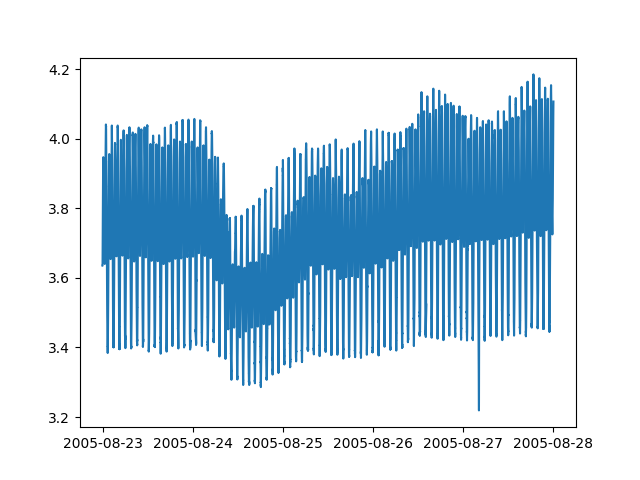

In [4]:
plt.figure()
plt.plot(df1['CD_New (~)'])